# XGBoost

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Final2.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.tail(20)

,SNO,BHK,Sq. ft.,Crime rate(%),Distance from Hospital,Distance from Workplace,Distance from Market,Distance from Rly. Station,Rent
29980,29980,2,593,22,10,6,3,10,6199
29981,29981,2,476,18,4,4,6,4,4683
29982,29982,3,1048,1,8,4,1,10,11560
29983,29983,1,361,34,10,3,6,3,4429
29984,29984,1,606,12,4,3,2,7,6322
29985,29985,3,1258,16,3,10,8,1,12253
29986,29986,3,1010,15,8,5,8,2,13389
29987,29987,1,434,4,5,3,7,1,5341
29988,29988,3,1188,1,8,3,6,2,12509
29989,29989,3,1182,2,7,6,10,5,13711


In [ ]:
X

array([[   1,  390,    5, ...,    8,    5,    6],
       [   2,  643,   17, ...,    1,    9,    6],
       [   2,  608,    2, ...,    8,    6,    9],
       ...,
       [   3, 1391,    3, ...,    1,    7,    1],
       [   2,  482,   19, ...,    6,    1,    4],
       [   1,  531,   22, ...,    1,    6,    8]])

In [ ]:
y

array([ 4233,  6966,  6466, ..., 13469,  4689,  6122])

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training XGBoost on the Training set

In [ ]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [ ]:
xg_reg.fit(X_train,y_train)

[14:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5)

## Predicting New Results -- > Passed By Rahul

In [ ]:
y_pred_test= xg_reg.predict([[1,250,7,5,10,5,10]])
y_pred_test

array([4130.591], dtype=float32)

In [ ]:
y_pred = xg_reg.predict(X_train)

In [ ]:
y_pred

array([10313.118 ,  6489.482 ,  4089.902 , ..., 12655.003 ,  6495.1846,
        4114.9146], dtype=float32)

#Ploting Feature Importance

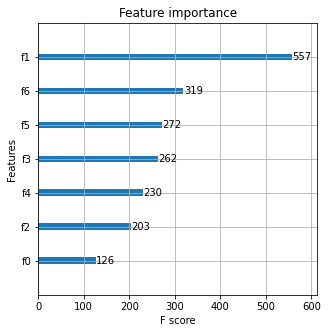

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xg_reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[14:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re